# Generating continental animated time series using `xr_animation`

* **Products used:** 
[ndvi_anomaly](https://explorer.digitalearth.africa/ndvi_anomaly)

## Background
Animations can be a powerful method for visualising change in the landscape across time using satellite imagery. Satellite data from Digital Earth Africa is an ideal subject for animations as it has been georeferenced, processed to analysis-ready surface reflectance, and stacked into a spatio-temporal 'data cube', allowing landscape conditions to be extracted and  visualised consistently across time.

Using the DE Africa functions in `Scripts/deafrica_plotting`, which are based on `matplotlib.animation` and `xarray`, we can take a time series of Digital Earth Africa satellite imagery and export a visually appealing time series animation that shows how any location in Africa has changed.

## Description
This notebook demonstrates how to:

1. Import a time series of mean monthly xarray dataset avaibale on the DE Africa platform. For this notebook we will be using the Mean NDVI and Anomalies service. More infomation on available [dataset](https://docs.digitalearthafrica.org/en/latest/data_specs/index.html)  
2. Export the resulting dataset in the form of animations as either a GIF or MP4

***

## Getting started
To run this analysis, run all the cells in the notebook, starting with the "Load packages" cell. 

### Load packages

In [1]:
%matplotlib inline

import datacube
import matplotlib.pyplot as plt
from IPython.display import Image

from deafrica_tools.plotting import xr_animation
from deafrica_tools.dask import create_local_dask_cluster

/usr/local/lib/python3.8/dist-packages/geopandas/_compat.py:112: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.10.3-CAPI-1.16.1). Conversions between both will be slow.
  warnings.warn(


In [2]:
create_local_dask_cluster()

Client Scheduler: tcp://127.0.0.1:40317 Dashboard: /user/nanaboamah89@gmail.com/proxy/8787/status,Cluster Workers: 1 Cores: 4 Memory: 28.14 GB


### Connect to the datacube

In [3]:
dc = datacube.Datacube(app='export_animated_timeseries')

## Load satellite data from datacube
We will use the dc load function to load data (i.e. ndvi_anomaly), and return an `xarray.Dataset`. 
This will allow us to create a visually appealing time series animation of observations for the selected time.

In [4]:
#Specify the time period for 
time_range = ('2019-01-01', '2019-12-31')

# Load available data
ds = dc.load(product='ndvi_anomaly',
              output_crs='epsg:6933',
              time = time_range,
              resolution=(-2500, 2500),
              dask_chunks=dict(x=2000,y=2000)
              )

ds = ds.compute()

## Animations

Exporting animation to ndvi_mean.gif


  0%|          | 0/12 (0.0 seconds remaining at ? frames/s)

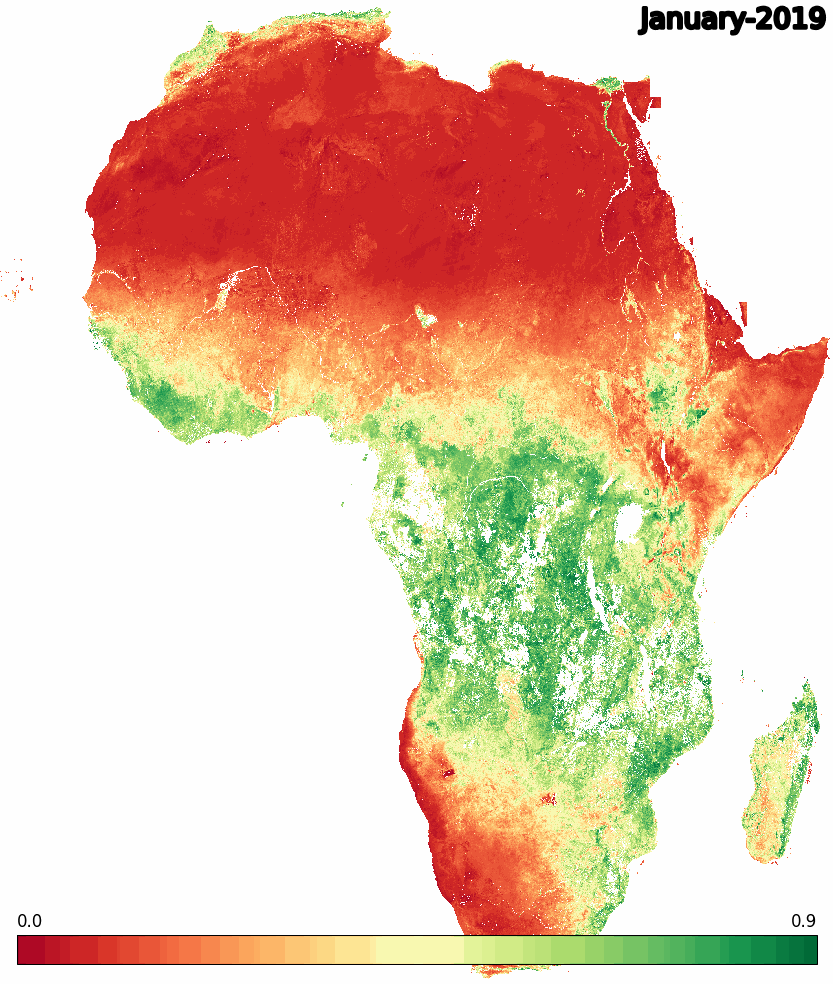

In [6]:
# # Produce time series animation
xr_animation(ds=ds, 
             output_path='ndvi_mean.gif',
             bands=['ndvi_mean'],  
             show_date='%B-%Y',
             interval=500,
             imshow_kwargs={'cmap': 'RdYlGn', 'vmin': 0.0, 'vmax': 0.9},
             colorbar_kwargs={'colors': 'black'},
             width_pixels=600,
             annotation_kwargs= {'color':'black', 'animated': True}
    ) 

# Plot animated gif
plt.close()
Image(filename='ndvi_mean.gif')

***

## Additional information

**License:** The code in this notebook is licensed under the [Apache License, Version 2.0](https://www.apache.org/licenses/LICENSE-2.0). 
Digital Earth Africa data is licensed under the [Creative Commons by Attribution 4.0](https://creativecommons.org/licenses/by/4.0/) license.

**Contact:** If you need assistance, please post a question on the [Open Data Cube Slack channel](http://slack.opendatacube.org/) or on the [GIS Stack Exchange](https://gis.stackexchange.com/questions/ask?tags=open-data-cube) using the `open-data-cube` tag (you can view previously asked questions [here](https://gis.stackexchange.com/questions/tagged/open-data-cube)).
If you would like to report an issue with this notebook, you can file one on [Github](https://github.com/digitalearthafrica/deafrica-sandbox-notebooks).

**Compatible datacube version:** 

In [ ]:
print(datacube.__version__)

**Last Tested:**

In [ ]:
from datetime import datetime
datetime.today().strftime('%Y-%m-%d')